<a href="https://colab.research.google.com/github/MathewLipman/Work-Samples/blob/main/World_Happiness_Multi_Continued.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values in rows or column options:

* Remove any rows that have missing values.
* Remove any columns that have missing values.
* Fill the missing values with some other value.
* Leave the missing values as is.

Weigh pros and cons of each option before making a decision regarding how to handle any missing data.

In [ ]:
import pandas as pd
happiness2015 = pd.read_csv("/content/drive/MyDrive/Dataset/World_Happiness_2015.csv") 
happiness2016 = pd.read_csv("/content/drive/MyDrive/Dataset/World_Happiness_2016.csv") 
happiness2017 = pd.read_csv("/content/drive/MyDrive/Dataset/World_Happiness_2017.csv") 
happiness2015['Year'] = 2015
happiness2016['Year'] = 2016
happiness2017['Year'] = 2017

In [ ]:
shape2015 = happiness2015.shape
shape2016 = happiness2016.shape
shape2017 = happiness2017.shape

In [ ]:
print(shape2015)
print(shape2016)
print(shape2017)

(158, 13)
(157, 14)
(155, 13)


In [ ]:
missing = happiness2015['Happiness Score'].isnull()
missing_2015 = happiness2015[missing]
print(missing_2015)

Empty DataFrame
Columns: [Country, Region, Happiness Rank, Happiness Score, Standard Error, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual, Year]
Index: []


In [ ]:
print(happiness2015.isnull().sum())

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64


In [ ]:
happiness2015 = pd.read_csv("/content/drive/MyDrive/Dataset/wh_2015.csv")
happiness2016 = pd.read_csv("/content/drive/MyDrive/Dataset/wh_2016.csv")
happiness2017 = pd.read_csv("/content/drive/MyDrive/Dataset/wh_2017.csv")
combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True)

In [ ]:
combined.isnull().sum()

Country                            0
Region                           177
Happiness Rank                   177
Happiness Score                  177
Standard Error                   334
Economy (GDP per Capita)         177
Family                            22
Health (Life Expectancy)         177
Freedom                           22
Trust (Government Corruption)    177
Generosity                        22
Dystopia Residual                177
Year                               0
Lower Confidence Interval        335
Upper Confidence Interval        335
Happiness.Rank                   337
Happiness.Score                  337
Whisker.high                     337
Whisker.low                      337
Economy..GDP.per.Capita.         337
Health..Life.Expectancy.         337
Trust..Government.Corruption.    337
Dystopia.Residual                337
dtype: int64

Method	Description
Series.str.split()	Splits each element in the Series.
Series.str.strip()	Strips whitespace from each string in the Series.
Series.str.lower()	Converts strings in the Series to lowercase.
Series.str.upper()	Converts strings in the Series to uppercase.
Series.str.get()	Retrieves the ith element of each element in the Series.
Series.str.replace()	Replaces a regex or string in the Series with another string.
Series.str.cat()	Concatenates strings in a Series.
Series.str.extract()	Extracts substrings from the Series matching a regex pattern.

Formatting the columns for all 3 files at the same time so there are no differences when we combine them.

In [ ]:
happiness2017.columns = happiness2017.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.upper()
happiness2016.columns = happiness2016.columns.str.replace('(', ' ').str.replace(')', ' ').str.upper()
happiness2015.columns = happiness2015.columns.str.replace('(', ' ').str.replace(')', ' ').str.upper()

<ipython-input-16-9e4e9cc634b6>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  happiness2017.columns = happiness2017.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.upper()
<ipython-input-16-9e4e9cc634b6>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  happiness2017.columns = happiness2017.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.upper()
<ipython-input-16-9e4e9cc634b6>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  happiness2016.columns = happiness2016.columns.str.replace('(', ' ').str.replace(')', ' ').str.upper()
<ipython-input-16-9e4e9cc634b6>:2: FutureWarning: The def

In [ ]:
combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True)

In [ ]:
missing = combined.isnull().sum()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.style as style

The data should be viewed vertical in thirds (1/3) as each ree represents null values for a different year in a differnt part of our data. Country for example has zero null values in any of the years.

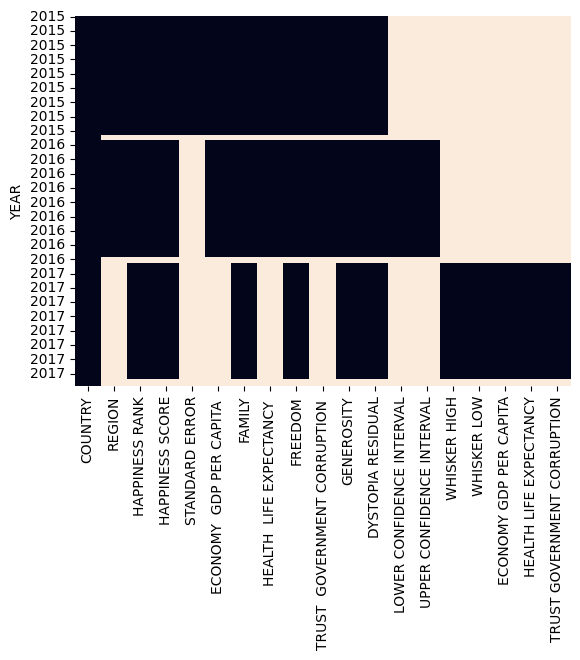

In [ ]:
import seaborn as sns
combined_updated = combined.set_index('YEAR')
sns.heatmap(combined_updated.isnull(), cbar=False)
plt.show()

In [ ]:
combined_updated.isnull().sum()

COUNTRY                            0
REGION                           177
HAPPINESS RANK                    22
HAPPINESS SCORE                   22
STANDARD ERROR                   334
ECONOMY  GDP PER CAPITA          177
FAMILY                            22
HEALTH  LIFE EXPECTANCY          177
FREEDOM                           22
TRUST  GOVERNMENT CORRUPTION     177
GENEROSITY                        22
DYSTOPIA RESIDUAL                 22
LOWER CONFIDENCE INTERVAL        335
UPPER CONFIDENCE INTERVAL        335
WHISKER HIGH                     337
WHISKER LOW                      337
ECONOMY GDP PER CAPITA           337
HEALTH LIFE EXPECTANCY           337
TRUST GOVERNMENT CORRUPTION      337
dtype: int64

In [ ]:
regions_2017 = combined[combined['YEAR']==2017]['REGION']
missing = regions_2017.isnull().sum()         
print(missing)

164


In [ ]:
dups = combined.duplicated(['COUNTRY', 'YEAR'])
combined_dups = combined[dups]

In [ ]:
combined['COUNTRY'] = combined['COUNTRY'].str.upper()
combined['COUNTRY'].head()

dups = combined.duplicated(['COUNTRY','YEAR'])
combined_dups = combined[dups]

In [ ]:
print(combined_dups)

               COUNTRY REGION  HAPPINESS RANK  HAPPINESS SCORE  \
162  SOMALILAND REGION    NaN             NaN              NaN   
326  SOMALILAND REGION    NaN             NaN              NaN   
489  SOMALILAND REGION    NaN             NaN              NaN   

     STANDARD ERROR  ECONOMY  GDP PER CAPITA   FAMILY  \
162             NaN                       NaN     NaN   
326             NaN                       NaN     NaN   
489             NaN                       NaN     NaN   

     HEALTH  LIFE EXPECTANCY   FREEDOM  TRUST  GOVERNMENT CORRUPTION   \
162                       NaN      NaN                            NaN   
326                       NaN      NaN                            NaN   
489                       NaN      NaN                            NaN   

     GENEROSITY  DYSTOPIA RESIDUAL  YEAR  LOWER CONFIDENCE INTERVAL  \
162         NaN                NaN  2015                        NaN   
326         NaN                NaN  2016                        NaN   


In [ ]:
somaliland_combined = combined[combined['COUNTRY'] == 'SOMALILAND REGION']

In [ ]:
print(somaliland_combined)

               COUNTRY              REGION  HAPPINESS RANK  HAPPINESS SCORE  \
90   SOMALILAND REGION  Sub-Saharan Africa            91.0            5.057   
162  SOMALILAND REGION                 NaN             NaN              NaN   
260  SOMALILAND REGION  Sub-Saharan Africa            97.0            5.057   
326  SOMALILAND REGION                 NaN             NaN              NaN   
488  SOMALILAND REGION                 NaN             NaN              NaN   
489  SOMALILAND REGION                 NaN             NaN              NaN   

     STANDARD ERROR  ECONOMY  GDP PER CAPITA    FAMILY  \
90          0.06161                   0.18847  0.95152   
162             NaN                       NaN      NaN   
260             NaN                   0.25558  0.75862   
326             NaN                       NaN      NaN   
488             NaN                       NaN      NaN   
489             NaN                       NaN      NaN   

     HEALTH  LIFE EXPECTANCY   FREEDOM 

In [ ]:
columns_to_drop = ['LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR', 'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 'WHISKER LOW']

combined = combined.drop(columns_to_drop, axis=1)
missing = combined.isnull().sum()

In [ ]:
print(combined.notnull().sum().sort_values())
combined.dropna(thresh = 159, axis = 1)
missing = combined.isnull().sum()

ECONOMY GDP PER CAPITA           155
HEALTH LIFE EXPECTANCY           155
TRUST GOVERNMENT CORRUPTION      155
REGION                           315
ECONOMY  GDP PER CAPITA          315
HEALTH  LIFE EXPECTANCY          315
TRUST  GOVERNMENT CORRUPTION     315
HAPPINESS RANK                   470
HAPPINESS SCORE                  470
FAMILY                           470
FREEDOM                          470
GENEROSITY                       470
DYSTOPIA RESIDUAL                470
COUNTRY                          492
YEAR                             492
dtype: int64


In [ ]:
print(combined.notnull().sum().sort_values())

ECONOMY GDP PER CAPITA           155
HEALTH LIFE EXPECTANCY           155
TRUST GOVERNMENT CORRUPTION      155
REGION                           315
ECONOMY  GDP PER CAPITA          315
HEALTH  LIFE EXPECTANCY          315
TRUST  GOVERNMENT CORRUPTION     315
HAPPINESS RANK                   470
HAPPINESS SCORE                  470
FAMILY                           470
FREEDOM                          470
GENEROSITY                       470
DYSTOPIA RESIDUAL                470
COUNTRY                          492
YEAR                             492
dtype: int64


In [ ]:
combined = combined.dropna(thresh=159, axis=1)
missing = combined.isnull().sum()


COUNTRY                            0
REGION                           177
HAPPINESS RANK                    22
HAPPINESS SCORE                   22
ECONOMY  GDP PER CAPITA          177
FAMILY                            22
HEALTH  LIFE EXPECTANCY          177
FREEDOM                           22
TRUST  GOVERNMENT CORRUPTION     177
GENEROSITY                        22
DYSTOPIA RESIDUAL                 22
YEAR                               0
dtype: int64


In [ ]:
print(missing)

COUNTRY                            0
REGION                           177
HAPPINESS RANK                    22
HAPPINESS SCORE                   22
ECONOMY  GDP PER CAPITA          177
FAMILY                            22
HEALTH  LIFE EXPECTANCY          177
FREEDOM                           22
TRUST  GOVERNMENT CORRUPTION     177
GENEROSITY                        22
DYSTOPIA RESIDUAL                 22
YEAR                               0
dtype: int64


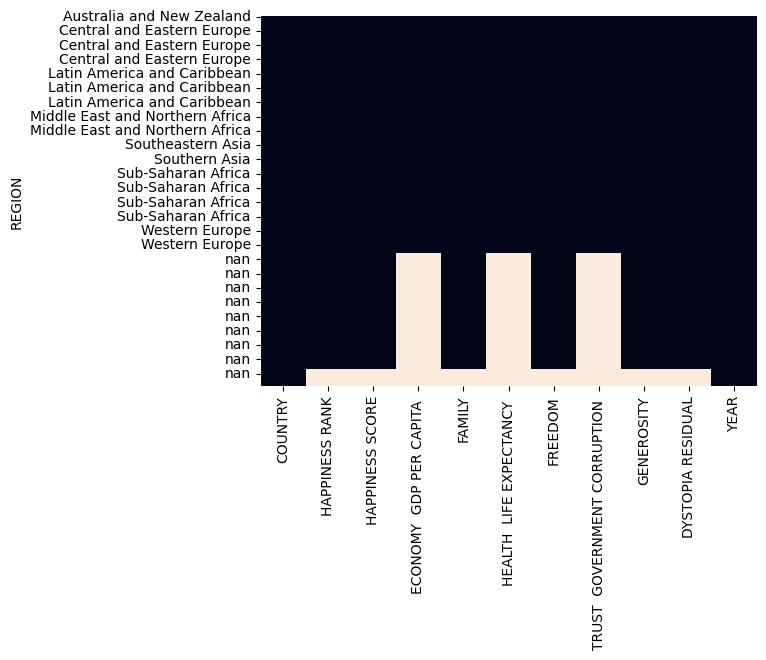

In [ ]:
sorted = combined.set_index('REGION').sort_values(['REGION', 'HAPPINESS SCORE'])
sns.heatmap(sorted.isnull(), cbar=False)
plt.show()

In [76]:
combined['REGION'].value_counts()

Sub-Saharan Africa                 78
Central and Eastern Europe         58
Latin America and Caribbean        46
Western Europe                     42
Middle East and Northern Africa    39
Southeastern Asia                  18
Southern Asia                      14
Eastern Asia                       12
North America                       4
Australia and New Zealand           4
Name: REGION, dtype: int64

In [77]:
happiness_mean = combined['HAPPINESS SCORE'].mean()
print(happiness_mean)
combined['HAPPINESS SCORE UPDATED'] = combined['HAPPINESS SCORE'].fillna(happiness_mean)
print(combined['HAPPINESS SCORE UPDATED'].mean())


5.37072765988289
5.370727659882891


In [78]:
combined = combined.dropna()
print(combined.isnull().sum())

COUNTRY                          0
REGION                           0
HAPPINESS RANK                   0
HAPPINESS SCORE                  0
ECONOMY  GDP PER CAPITA          0
FAMILY                           0
HEALTH  LIFE EXPECTANCY          0
FREEDOM                          0
TRUST  GOVERNMENT CORRUPTION     0
GENEROSITY                       0
DYSTOPIA RESIDUAL                0
YEAR                             0
HAPPINESS SCORE UPDATED          0
dtype: int64
